In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'seaborn'

In [2]:
df =pd.read_csv("C:/Users/Genesis/OneDrive/Desktop/Projects/Earthquake_Predictor/dataset/Japan_Earthquake_1920_2020.csv")
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-12-12T23:49:38.281Z,35.5552,138.6886,182.40,4.0,mb,NaN,108.0,0.968,0.56,...,2021-02-20T16:12:29.040Z,"7 km N of Fujikawaguchiko, Japan",earthquake,6.7,6.0,0.119,19.0,reviewed,us,us
1,2020-12-12T07:18:54.231Z,40.1213,142.0551,44.00,5.5,mww,NaN,69.0,1.008,0.66,...,2021-02-20T16:11:27.040Z,"53 km N of Miyako, Japan",earthquake,6.4,1.9,0.063,24.0,reviewed,us,us
2,2020-12-11T12:58:06.708Z,23.9426,125.3592,26.64,4.8,mb,NaN,98.0,2.206,0.70,...,2021-02-20T16:11:19.040Z,"95 km S of Hirara, Japan",earthquake,3.1,5.9,0.102,30.0,reviewed,us,us
3,2020-12-11T09:48:40.595Z,24.2994,125.2777,19.46,5.1,mww,NaN,75.0,2.073,0.66,...,2021-02-20T16:11:17.040Z,"southwestern Ryukyu Islands, Japan",earthquake,6.1,3.4,0.057,30.0,reviewed,us,us
4,2020-12-10T18:15:08.670Z,24.5390,122.0538,66.38,4.9,mww,NaN,32.0,0.554,1.04,...,2021-02-20T16:11:09.040Z,"38 km SE of Yilan, Taiwan",earthquake,5.7,4.5,0.098,10.0,reviewed,us,us


In [3]:
train_df = df[['time','latitude','longitude','depth','mag']]
train_df.head()

,time,latitude,longitude,depth,mag
0,2020-12-12T23:49:38.281Z,35.5552,138.6886,182.40,4.0
1,2020-12-12T07:18:54.231Z,40.1213,142.0551,44.00,5.5
2,2020-12-11T12:58:06.708Z,23.9426,125.3592,26.64,4.8
3,2020-12-11T09:48:40.595Z,24.2994,125.2777,19.46,5.1
4,2020-12-10T18:15:08.670Z,24.5390,122.0538,66.38,4.9


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50551 entries, 0 to 50550
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       50551 non-null  object 
 1   latitude   50551 non-null  float64
 2   longitude  50551 non-null  float64
 3   depth      50551 non-null  float64
 4   mag        50551 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [8]:
#checking if any null values exist or not.
train_df.isna().sum()

time         0
latitude     0
longitude    0
depth        0
mag          0
dtype: int64

In [11]:
#checking if any duplicate values are there in the training dataset
train_df.duplicated().sum()

0

In [12]:
#checking unique entities for each and every column
train_df.nunique()

time         50551
latitude     26746
longitude    24268
depth         8781
mag             63
dtype: int64

In [13]:
train_df.describe()

,latitude,longitude,depth,mag
count,50551.000000,50551.000000,50551.000000,50551.000000
mean,34.140673,139.543968,74.914381,4.553033
std,6.783747,6.835210,105.093544,0.545127
min,20.000000,122.000000,0.000000,2.500000
25%,28.191200,138.665000,28.400000,4.200000
50%,35.404000,141.612000,35.000000,4.500000
75%,39.368500,143.353000,64.600000,4.800000
max,45.000000,152.990000,686.390000,9.100000


Insights:

1. Mean Earthquakes had a magnitude of 4.55 on Richter scale.
2. The maximum recorded earthquake in Japan had a magnitude of 9.1 and depth 686.39.
3. On Average the earthquakes had a depth of 74km.

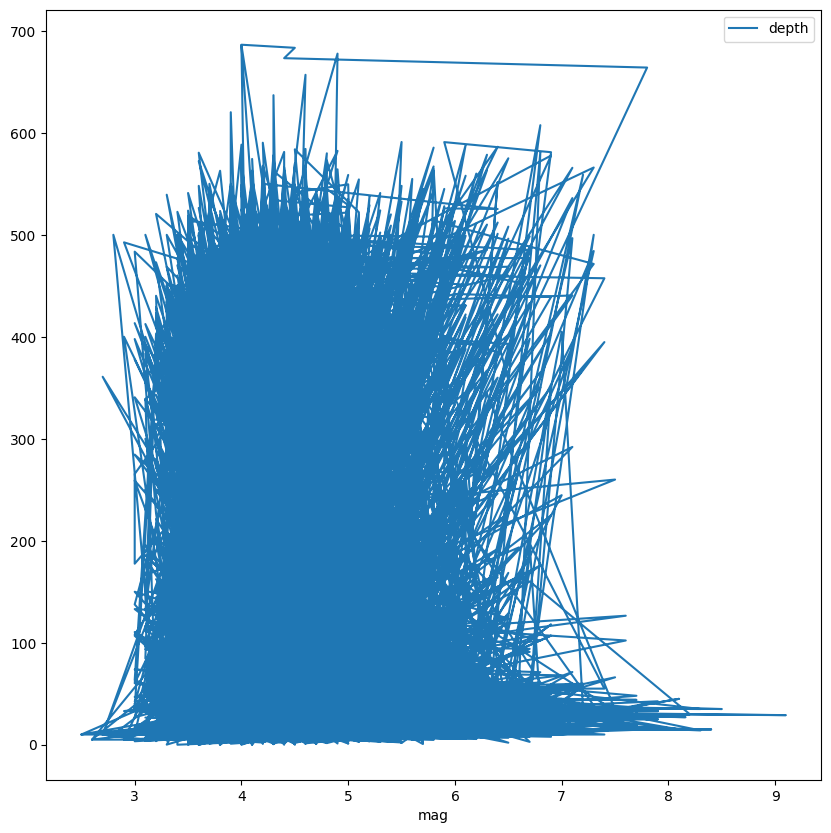

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sn.histplot(data=df,x='average_marks',bins=30,kde=True,color='g')
plt.subplot(122)
sn.histplot(data=df,x='average_marks',kde=True,hue='gender')
plt.show()